# Workshop 7. Neural Network

## 1. Logistic Regression
#### 1. Prediction function for logistic regression
$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T x}}
$$

#### 2. Cost function
$$
\begin{aligned}
&J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^m y^i \log h_\theta\left(x^i\right)+\left(1-y^i\right) \log \left(1-h_\theta\left(x^i\right)\right)\right]
\end{aligned}
$$

#### 3. Gradient Descent
$$
\theta_j:=\theta_j-\alpha \frac{1}{m} \sum_{i=1}^m\left(h_\theta\left(x^i\right)-y^i\right) x_j^i
$$

In [85]:
import pandas as pd
#from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

raw_data_df = pd.read_csv("riceClassification.csv").drop(columns=["id"])

label_df = raw_data_df["Class"]
feature_df = raw_data_df.drop(columns=["Class"])

Normalized_feature_df = pd.DataFrame()
max_list = []
min_list = []
for i in feature_df.columns:
    max_ = np.amax(feature_df[i])
    min_ = np.amin(feature_df[i])
    max_list.append(max_)
    min_list.append(min_)
    normlist = (feature_df[i]-min_)/(max_-min_)
    Normalized_feature_df = pd.concat([Normalized_feature_df,normlist],axis=1).fillna(0)
Norm_Dataset = pd.concat([Normalized_feature_df,label_df],axis=1).to_numpy()
Norm_Dataset


array([[0.26209677, 0.165901  , 0.61492191, ..., 0.8079338 , 0.03237142,
        1.        ],
       [0.04552549, 0.00512262, 0.35293423, ..., 0.89989824, 0.03720397,
        1.        ],
       [0.06841831, 0.01980274, 0.36629163, ..., 0.95026456, 0.04222159,
        1.        ],
       ...,
       [0.49986993, 0.73932171, 0.38425128, ..., 0.69607063, 0.61372026,
        0.        ],
       [0.44719043, 0.7083425 , 0.35447441, ..., 0.63087258, 0.61991531,
        0.        ],
       [0.4698231 , 0.72378147, 0.35688412, ..., 0.68161115, 0.63010796,
        0.        ]])

In [90]:
data_feature = Norm_Dataset[:,:-1]
data_label = Norm_Dataset[:,-1]

train_feature = data_feature[:12000]
test_feature = data_feature[12000:]

train_label = data_label[:12000]
test_label = data_label[12000:]

X = np.concatenate((np.ones((train_feature.shape[0],1)), train_feature),axis=1)
theta = np.ones((X.shape[1],1))

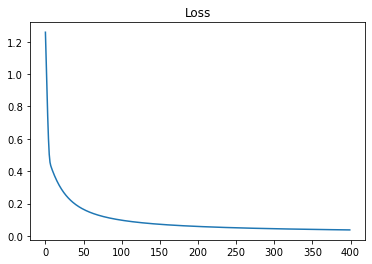

In [112]:
lr = 0.0001
m = len(train_label)
train_label = train_label.reshape(-1,1)
theta = np.ones((X.shape[1],1))
y_pred = 1/(1+np.exp(-(X@theta))).reshape(m,1)

loss_list=[]
for epoch in range(400):
    
    Loss = (-1/m)*sum(train_label * np.log(y_pred) + (1-train_label) * np.log(1-y_pred))
    loss_list.append(Loss)
    
    theta-=lr*X.T@(y_pred-train_label)
    y_pred = 1/(1+np.exp(-(X@theta))).reshape(m,1)
    
plt.title("Loss")
plt.plot(loss_list)

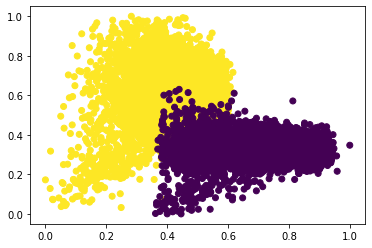

In [146]:
plt.scatter(Norm_Dataset[:,4],Norm_Dataset[:,-2],c=Norm_Dataset[:,-1])

In [126]:
X_test = np.concatenate((np.ones((test_feature.shape[0],1)), test_feature),axis=1)
y_pred = 1/(1+np.exp(-(X_test@theta)))

pred_label_list=[]
for i in y_pred:
    if(i>=0.5):
        pred_label_list.append(1)
    else:
        pred_label_list.append(0)
        
pred_label = np.array(pred_label_list)

count=0
for j in (test_label-pred_label):
    if (j==0):
        count+=1
        
count/len(test_label)

0.8842360549717058

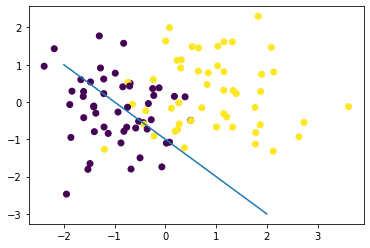

In [198]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate classification dataset
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,random_state=2043)
X = np.concatenate((np.ones((x.shape[0],1)), x),axis=1)
theta = np.ones((X.shape[1],1))

b_x = [i for i in range(-2,3)]
b_y = (-theta[0]-b_x*theta[1])/theta[2]

plt.scatter(x[:,0], x[:,1], c=y)
plt.plot(b_x,b_y)

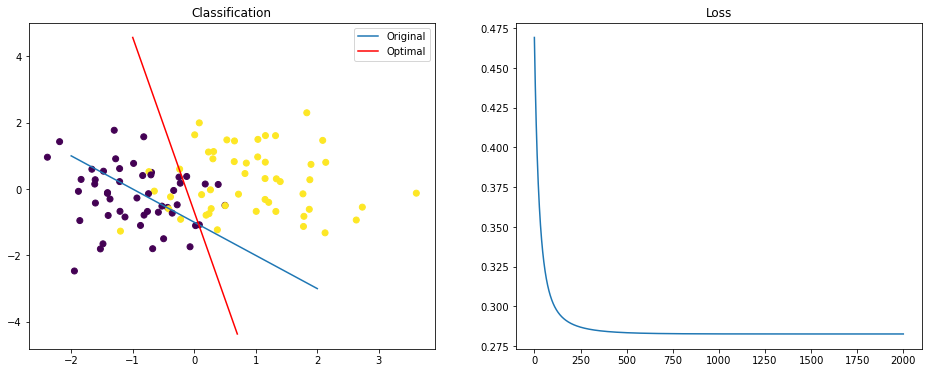

In [73]:
lr = 0.001
m = len(y)
y = y.reshape(-1,1)
theta = np.ones((X.shape[1],1))
y_pred = 1/(1+np.exp(-(X@theta))).reshape(m,1)

loss_list=[]
for epoch in range(2000):
    
    Loss = (-1/m)*sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
    loss_list.append(Loss)
    
    theta-=lr*X.T@(y_pred-y)
    y_pred = 1/(1+np.exp(-(X@theta))).reshape(m,1)
    
new_b_x = [[-1],[0.7]]
new_b_y = (-theta[0]-new_b_x*theta[1])/theta[2]
#plt.xlim(-3,4)
#plt.xlim(-3,3)

plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.title("Classification")
plt.scatter(x[:,0], x[:,1], c=y)
plt.plot(b_x,b_y,label="Original")
plt.plot(new_b_x,new_b_y,c="r",label="Optimal")
plt.legend()

plt.subplot(1,2,2)
plt.title("Loss")
plt.plot(loss_list)

## 2. Neural Network
### 2.1 Forward Propagation
Forward propagation is where input data is fed through a network, in a forward direction, to generate an output.
#### Exercise 1. Could you design scripts to compute the output of the following neural network?

In [83]:
data = np.array([0.3,0.7,0.2]).reshape(1,-1)
weight = np.array([0.5,0.2,0.3]).reshape(-1,1)
data@weight

array([[0.35]])

In [87]:
data = np.array([0.3,0.7]).reshape(1,-1)
weight_1 = np.array([[0.5,0.2,0.4],[-0.3,-0.3,0.6]])
weight_2 = np.array([0.5,-0.6,0.8]).reshape(-1,1)
data@weight_1@weight_2

array([[0.492]])

In [88]:
data = np.array([0.3,0.7,0.2]).reshape(1,-1)
weight = np.array([0.5,0.2,0.3]).reshape(-1,1)
z = data@weight
output = 1/(1+np.exp(-z))
output

array([[0.58661758]])

In [90]:
data = np.array([0.3,0.7]).reshape(1,-1)
weight_1 = np.array([[0.5,0.2,0.4],[-0.3,-0.3,0.6]])
weight_2 = np.array([0.5,-0.6,0.8]).reshape(-1,1)
z1 = data@weight_1
h = 1/(1+np.exp(-z1))

z2 = h@weight_2
output = 1/(1+np.exp(-z2))
output

array([[0.61548081]])

### 2.2 Backward Propagation

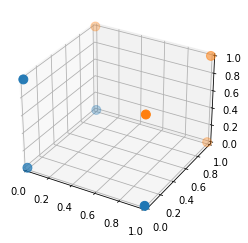

In [6]:
data = np.array([[1,0,0,0],#0
                 [1,0,0,1],#0
                 [1,1,0,0],#0
                 [1,0,1,0],#0
                 [1,1,1,0],#1
                 [1,0,1,1],#1
                 [1,1,0,1],#1
                 [1,1,1,1]])#1

y = np.array([0,0,0,0,1,1,1,1])

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.scatter(data[:4,1],data[:4,2],data[:4,3],s=80)
ax.scatter(data[4:,1],data[4:,2],data[4:,3],s=80)

#### 1. Square error, without activation function

In [113]:
theta = np.array([1.0,2.0,1.0,1.0])
alpha = 0.005

for epoch in range(10000):
    y_pred = data@theta
    theta-=alpha*(y_pred-y)@data
    
z = data@theta
z

array([-0.25,  0.25,  0.25,  0.25,  0.75,  0.75,  0.75,  1.25])

#### 2. Square error, Sigmoid activation function:
$$
f(z)=\frac{1}{1+e^{-z}}
$$

In [106]:
theta = np.array([1.0,2.0,1.0,1.0])
alpha = 0.05

for epoch in range(5000):
    z = data@theta
    a = 1/(1+np.exp(-z))
    j = a*(1-a)
    theta-=alpha*((a-y)*j)@data
    
z = data@theta
a = 1/(1+np.exp(-z))
a

array([0.00133963, 0.1044789 , 0.1044789 , 0.1044789 , 0.91029002,
       0.91029002, 0.91029002, 0.99886817])

#### 3. Square error, Tanh activation function:
$$
f(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}
$$

In [20]:
theta = np.array([1.0,2.0,1.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.01

for epoch in range(5000):
    z = data@theta
    a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    j=1-a**2
    theta-=alpha*(((1-y)/(1-a)-y/a)*j)@data
    
z = data@theta
a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
a

array([-0.99999371, -0.95990077, -0.95990077, -0.95990077,  0.98508491,
        0.98508491,  0.98508491,  0.99999769])

In [22]:
test_data = np.array([1,0.2,0.1,0.05])
z = test_data@theta
a = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
a

-0.9998640781861056

#### 4. Cross-entropy loss, Sigmoid activation function:
$$
f(z)=\frac{1}{1+e^{-z}}
$$

In [2]:
import numpy as np

In [14]:
theta = np.array([1.0,2.0,2.0,1.0])
y = np.array([0,0,0,0,1,1,1,1])
alpha = 0.005

for epoch in range(2000):
    z = data@theta
    a = 1/(1+np.exp(-z))
    j = a*(1-a)
    theta-=alpha*(((1-y)/(1-a)-y/a)*j)@data
    
z = data@theta
a = 1/(1+np.exp(-z))
a

array([0.01903027, 0.23078929, 0.23528558, 0.23528558, 0.82992643,
       0.82634598, 0.82634598, 0.98692326])

In [103]:
data_2D = np.array([[1,0,0],#0
                    [1,1,0],#1
                    [1,0,1],#1
                    [1,1,1]])#0

In [194]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0],
                    [0.0]])
y = np.array([0,1,1,0]).reshape(-1,1)
alpha = 0.05

for epoch in range(90000):
    z_1 = data_2D@theta_1
    h_1 = 1/(1+np.exp(-z_1))
    z_2 = h_1@theta_2
    h_2 = 1/(1+np.exp(-z_2))
    
    theta_2-=alpha*h_1.T@(h_2-y)
    theta_1-=alpha*data_2D.T@(((h_2-y)@theta_2.T)*h_1*(1-h_1))
    
    
z_1 = data_2D@theta_1
h_1 = 1/(1+np.exp(-z_1))
z_2 = h_1@theta_2
h_2 = 1/(1+np.exp(-z_2))

h_2

array([[0.00405776],
       [0.99782612],
       [0.99782612],
       [0.00343751]])

In [220]:
theta_1 = np.array([[1.0,0.0],
                    [1.0,0.0],
                    [1.0,0.0]])
theta_2 = np.array([[1.0],
                    [0.0]])
y = y.reshape(-1,1)
alpha = 0.05

for epoch in range(40):
    z_1 = X@theta_1
    h_1 = 1/(1+np.exp(-z_1))
    z_2 = h_1@theta_2
    h_2 = 1/(1+np.exp(-z_2))
    
    theta_2-=alpha*h_1.T@(h_2-y)
    theta_1-=alpha*X.T@(((h_2-y)@theta_2.T)*h_1*(1-h_1))
    
    
z_1 = X@theta_1
h_1 = 1/(1+np.exp(-z_1))
z_2 = h_1@theta_2
h_2 = 1/(1+np.exp(-z_2))

pred_list=[]
for i in h_2:
    if(i>=0.5):
        pred_list.append(1)
    else:
        pred_list.append(0)
        
count=0
for i in (np.array(pred_list)-y.reshape(-1)):
    if(i==0):
        count+=1
        
count/len(y)

0.89

In [199]:
count=0
for i in (np.array(pred_list)-y):
    if(i==0):
        count+=1
        
count/len(y)

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])